**`Load Package`**

In [1]:
import os
import logging
import subprocess
import psutil
import resource
# memory_limit = 20 * 1024 * 1024 * 1024
# resource.setrlimit(resource.RLIMIT_AS, (memory_limit, memory_limit))


import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning, message=".*OldFormatWarning.*")

import numpy as np
import pandas as pd
import scipy as sp

import matplotlib.pyplot as plt
from matplotlib import rcParams, colors
import seaborn as sb

import omicverse as ov
import scanpy as sc
import scanorama
import scib
import scvi


   ____            _     _    __                  
  / __ \____ ___  (_)___| |  / /__  _____________ 
 / / / / __ `__ \/ / ___/ | / / _ \/ ___/ ___/ _ \ 
/ /_/ / / / / / / / /__ | |/ /  __/ /  (__  )  __/ 
\____/_/ /_/ /_/_/\___/ |___/\___/_/  /____/\___/                                              

Version: 1.6.10, Tutorials: https://omicverse.readthedocs.io/


/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/anndata/utils.py:434: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/anndata/utils.py:434: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/anndata/utils.py:434: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)
/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/anndata/utils.py:434: FutureWarning: Importing CSCDataset from `anndata.experimental` is deprecated. Import anndata.abc.CSCDataset instead.
  warnings.warn(msg, FutureWarning)
/home/data/t050502/miniconda3/envs/omicverse/lib/p

In [2]:
import omicverse as ov
print(f"omiverse version: {ov.__version__}")
import scanpy as sc
print(f"scanpy version: {sc.__version__}")
import scvi
print(f"scvi version: {scvi.__version__}")
import scib
print(f"scib version: {scib.__version__}")
# ov.ov_plot_set()

omiverse version: 1.6.10
scanpy version: 1.10.4
scvi version: 1.3.0
scib version: 1.1.7


In [3]:
adata_bk = sc.read_h5ad('../Data/Immune_human_mouse/human_alldata_qc.h5ad')
adata_bk.obs['batch'].unique()

['Oetjen_A', 'Oetjen_P', 'Oetjen_U', 'Freytag', '10X', 'Sun_sample1_CS', 'Sun_sample2_KC', 'Sun_sample3_TB', 'Sun_sample4_TC', 'Villani']
Categories (10, object): ['10X', 'Freytag', 'Oetjen_A', 'Oetjen_P', ..., 'Sun_sample2_KC', 'Sun_sample3_TB', 'Sun_sample4_TC', 'Villani']

In [5]:
adata = adata_bk.copy()
adata.layers["counts"] = adata.X.copy()
adata = ov.pp.preprocess(
    adata,
    mode='shiftlog|pearson',
    n_HVGs=2000,
    batch_key='batch'
)

adata.raw = adata
adata.var['highly_variable'] = adata.var['highly_variable_features'].copy()
adata = adata[:, adata.var.highly_variable_features]

ov.pp.scale(adata,max_value=10)
ov.pp.pca(adata,layer='scaled',n_pcs=50)

sc.pp.neighbors(
    adata,
    use_rep='X_pca',
    key_added='pca_neighbours'
)

sc.tl.umap(
    adata,
    neighbors_key='pca_neighbours'
)

key_added = 'X_pca'
adata.obsm[f'{key_added}_umap'] = adata.obsm['X_umap'].copy()

Begin robust gene identification
After filtration, 8128/8128 genes are kept.     Among 8128 genes, 8128 genes are robust.
End of robust gene identification.
Begin size normalization: shiftlog and HVGs selection pearson


/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:207: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/scanpy/experimental/pp/_highly_variable_genes.py:153: UserWarning: `flavor='pearson_residuals'` expects raw count data, but non-integers were found.
  warnings.warn(


Time to analyze data in cpu: 8.907002925872803 seconds.
End of size normalization: shiftlog and HVGs selection pearson


/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/omicverse/pp/_preprocess.py:514: ImplicitModificationWarning: Setting element `.layers['scaled']` of view, initializing view as actual.
  adata.layers[layers_add] = adata_mock.X.copy()


In [7]:
batches_to_extract = ['Sun_sample1_CS','Sun_sample2_KC','Sun_sample3_TB','Sun_sample4_TC','Freytag','10X','Villani']
human_pbmc = adata[adata.obs['batch'].isin(batches_to_extract)].copy()
print(human_pbmc)
print(human_pbmc.obs['batch'].unique())
print(human_pbmc.X.shape)

AnnData object with n_obs × n_vars = 18484 × 2000
    obs: 'batch', 'chemistry', 'data_type', 'dpt_pseudotime', 'final_annotation', 'mt_frac', 'n_counts', 'n_genes', 'size_factors', 'species', 'study', 'tissue', 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'doublet_score', 'predicted_doublet', 'passing_mt', 'passing_nUMIs', 'passing_ngenes'
    var: 'mt', 'n_cells', 'percent_cells', 'robust', 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'highly_variable_nbatches', 'highly_variable_intersection', 'highly_variable_features', 'highly_variable'
    uns: 'scrublet', 'log1p', 'hvg', 'pca', 'scaled|original|pca_var_ratios', 'scaled|original|cum_sum_eigenvalues', 'pca_neighbours', 'umap'
    obsm: 'X_pca', 'scaled|original|X_pca', 'X_umap', 'X_pca_umap'
    varm: 'PCs', 'scaled|original|pca_loadings'
    layers: 'counts', 'scaled'
    obsp: 'pca_neighbours_distances', 'pca_neighbours_connectivities'
['Freytag', '10X', 'Sun_sample1_CS', 'Sun_sample2_KC', 'Su

In [13]:
adata_scanorama=human_pbmc.copy()

In [14]:
adata_scanorama.layers["counts"] = adata_scanorama.X.copy()

# 将数据按 batch 分开
batches = adata_scanorama.obs['batch'].cat.categories.tolist()
alldata = {}
for batch in batches:
    alldata[batch] = adata_scanorama[adata_scanorama.obs['batch'] == batch, :]

adatas = list(alldata.values())
scanorama.integrate_scanpy(adatas, dimred=30)
scanorama_int = [ad.obsm['X_scanorama'] for ad in adatas]
all_s = np.concatenate(scanorama_int)

adata_scanorama.obsm["X_scanorama"] = all_s

Found 2000 genes among all datasets
[[0.         0.61567636 0.31748158 0.21338673 0.16751701 0.17
  0.16144814]
 [0.         0.         0.74336283 0.40834387 0.51190476 0.42666667
  0.        ]
 [0.         0.         0.         0.93993135 0.51870748 0.47555556
  0.        ]
 [0.         0.         0.         0.         0.7329932  0.62888889
  0.        ]
 [0.         0.         0.         0.         0.         0.90555556
  0.00255102]
 [0.         0.         0.         0.         0.         0.
  0.03      ]
 [0.         0.         0.         0.         0.         0.
  0.        ]]
Processing datasets (2, 3)
Processing datasets (4, 5)
Processing datasets (1, 2)
Processing datasets (3, 4)
Processing datasets (3, 5)
Processing datasets (0, 1)
Processing datasets (2, 4)
Processing datasets (1, 4)
Processing datasets (2, 5)
Processing datasets (1, 5)
Processing datasets (1, 3)
Processing datasets (0, 2)
Processing datasets (0, 3)
Processing datasets (0, 5)
Processing datasets (0, 4)
Proces

/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/scanorama/scanorama.py:284: ImplicitModificationWarning: Setting element `.obsm['X_scanorama']` of view, initializing view as actual.
  adata.obsm['X_scanorama'] = X_dimred


In [15]:
sc.pp.neighbors(
    adata_scanorama,
    use_rep='X_scanorama',
    key_added='scanorama_neighbours'
)

sc.tl.umap(
    adata_scanorama,
    neighbors_key='scanorama_neighbours'
)

key_added = 'X_scanorama'
adata_scanorama.obsm[f'{key_added}_umap'] = adata_scanorama.obsm['X_umap'].copy()
print(adata_scanorama)

AnnData object with n_obs × n_vars = 18484 × 2000
    obs: 'batch', 'chemistry', 'data_type', 'dpt_pseudotime', 'final_annotation', 'mt_frac', 'n_counts', 'n_genes', 'size_factors', 'species', 'study', 'tissue', 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'doublet_score', 'predicted_doublet', 'passing_mt', 'passing_nUMIs', 'passing_ngenes'
    var: 'mt', 'n_cells', 'percent_cells', 'robust', 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'highly_variable_nbatches', 'highly_variable_intersection', 'highly_variable_features', 'highly_variable'
    uns: 'scrublet', 'log1p', 'hvg', 'pca', 'scaled|original|pca_var_ratios', 'scaled|original|cum_sum_eigenvalues', 'pca_neighbours', 'umap', 'scanorama_neighbours'
    obsm: 'X_pca', 'scaled|original|X_pca', 'X_umap', 'X_pca_umap', 'X_scanorama', 'X_scanorama_umap'
    varm: 'PCs', 'scaled|original|pca_loadings'
    layers: 'counts', 'scaled'
    obsp: 'pca_neighbours_distances', 'pca_neighbours_connectivities'

/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/omicverse/utils/_scatterplot.py:1268: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if is_categorical_dtype(values) or values.dtype == bool:
/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/omicverse/utils/_scatterplot.py:1277: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/data/t050502/mi

[<AxesSubplot: title={'center': 'batch'}, xlabel='X_scanorama_umap1', ylabel='X_scanorama_umap2'>,
 <AxesSubplot: title={'center': 'final_annotation'}, xlabel='X_scanorama_umap1', ylabel='X_scanorama_umap2'>]

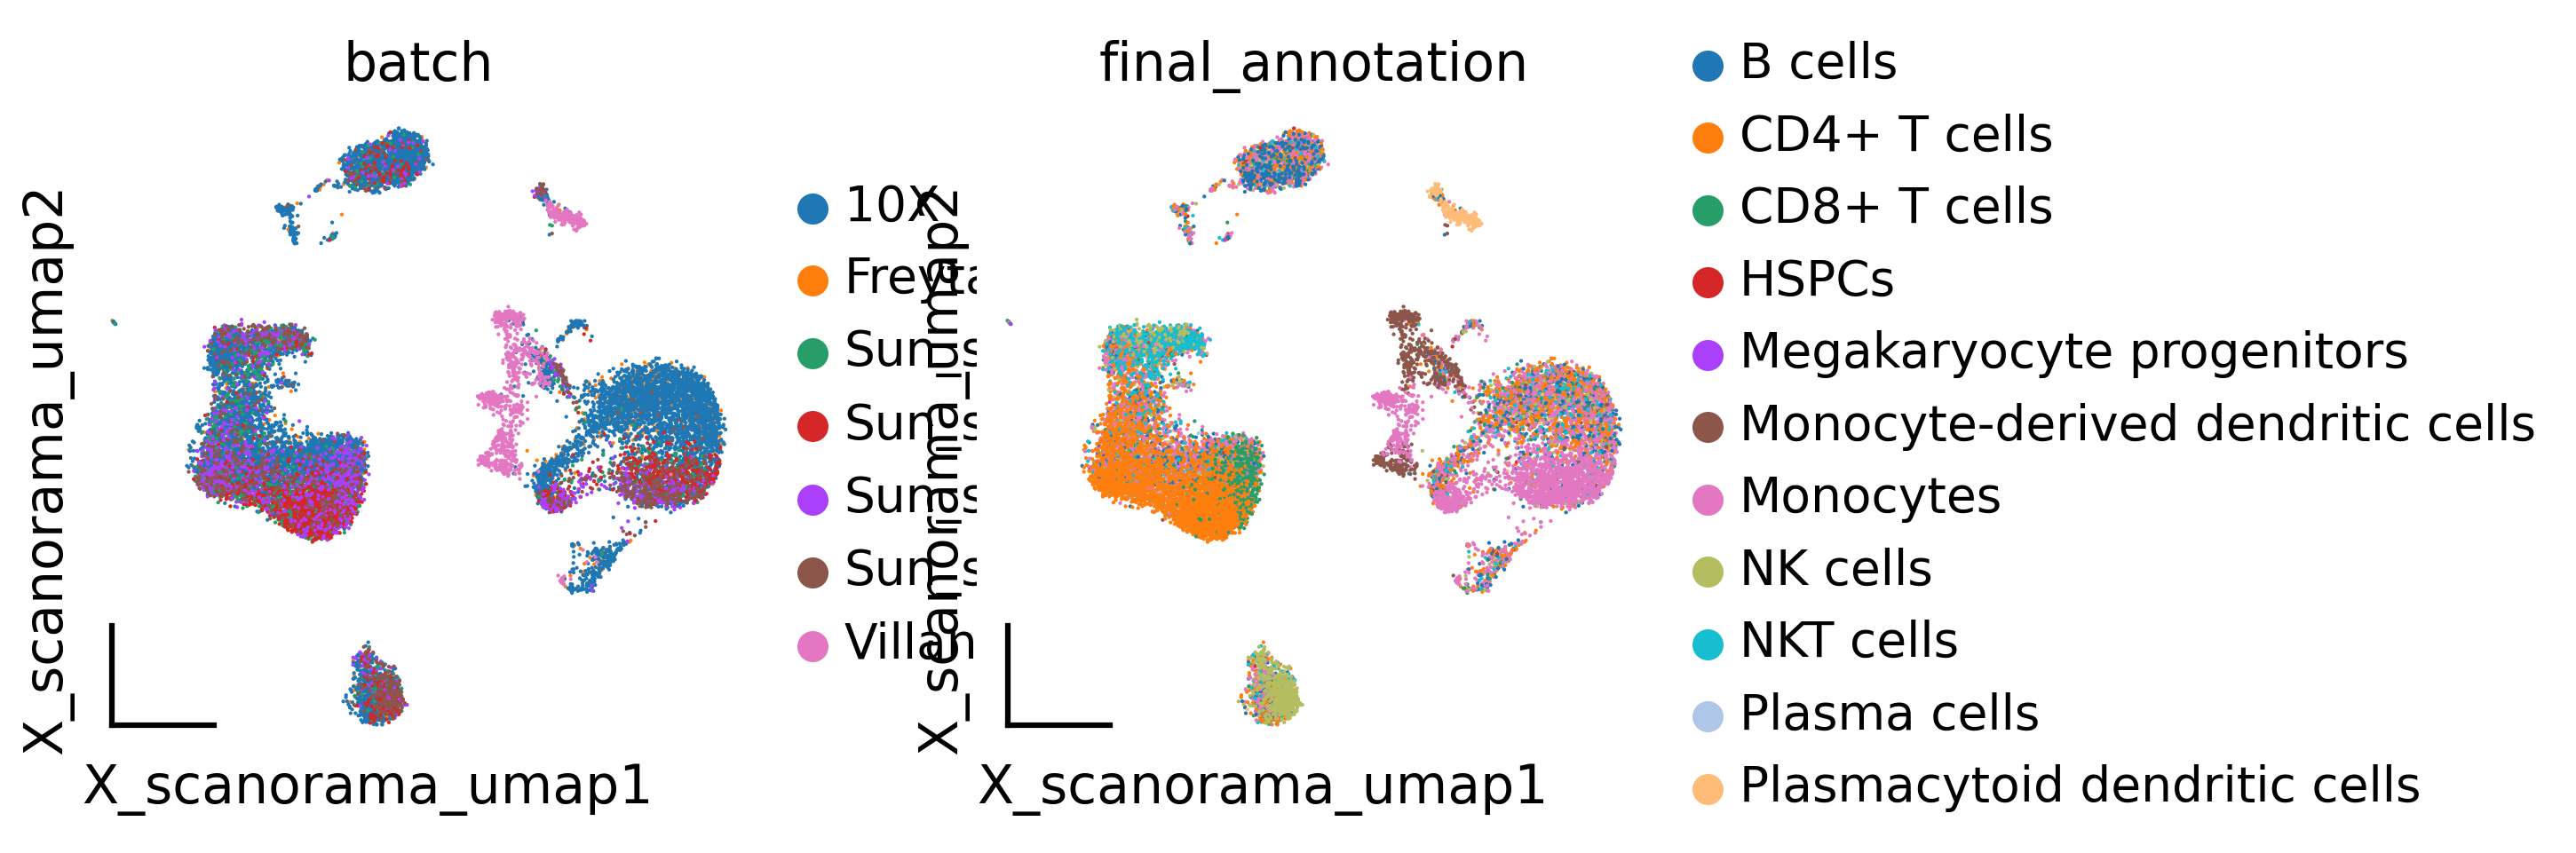

In [16]:
ov.utils.embedding(adata_scanorama,
                basis='X_scanorama_umap',frameon='small',
                color=['batch','final_annotation'],show=False)

In [21]:
# adata_scanorama = adata_scanorama.raw.to_adata()
print(adata_scanorama.X.shape)

obs_df = adata_scanorama.obs.copy()
for col in obs_df.columns:
    if obs_df[col].dtype.name == "category":
        obs_df[col] = obs_df[col].astype("object")
adata_scanorama.obs = obs_df

adata_scanorama.write_h5ad('../Data/Immune_human_mouse/human_pbmc_diff_platform_scanorama.h5ad', 
                 convert_strings_to_categoricals = False)

(18484, 8128)


**`Visulize in R`**

In [2]:
# load function
source('./Seurat_Function.R')
# load package
options(stringsAsFactors = F)
for(i in pg){suppressMessages(library(i, character.only = T))}
# set memery and core number
options(future.globals.maxSize = 20 * 1024^3) 
plan(multicore, workers = 12)

**`Load h5ad Data and convert to seurat`**

In [3]:
getAnywhere(convert_h5ad_to_seuratv5)

A single object matching ‘convert_h5ad_to_seuratv5’ was found
It was found in the following places
  .GlobalEnv
with value

function (h5ad_path = "", output_dir = "", prefix_name = "", 
    include_all_assays = FALSE, save = TRUE, verbose = TRUE) 
{
    if (!file.exists(h5ad_path)) 
        stop("The specified .h5ad file does not exist.")
    if (!dir.exists(output_dir)) 
        stop("The specified output directory does not exist.")
    if (is.null(prefix_name) || prefix_name == "") 
        stop("The 'prefix_name' argument is missing or empty.")
    base_name <- tools::file_path_sans_ext(basename(h5ad_path))
    h5seurat_path <- sub("\\.h5ad$", ".h5seurat", h5ad_path)
    if (verbose) 
        cat("Converting .h5ad to .h5seurat...\n")
    Convert(h5ad_path, dest = "h5seurat", overwrite = TRUE, assay = "RNA", 
        filename = h5seurat_path)
    if (verbose) 
        cat("Detecting available assays...\n")
    get_available_assays <- function(h5seurat_path) {
        h5_structure <- 

In [4]:
h5ad_path = '../Data/Immune_human_mouse/human_pbmc_diff_platform_scanorama.h5ad'

obj <- convert_h5ad_to_seuratv5(h5ad_path = h5ad_path,
    output_dir = '../Data/raw_seurat/',
    prefix_name = 'human_pbmc_diff_platform_scanorama',
    include_all_assays = TRUE,
    save = TRUE,
    verbose = TRUE
)

Converting .h5ad to .h5seurat...


Warning message:
“Unknown file type: h5ad”
Creating h5Seurat file for version 3.1.5.9900

Adding X as data

Adding X as counts

Adding meta.features from var

Adding X_pca as cell embeddings for pca

Adding X_pca_umap as cell embeddings for pca_umap

Adding X_scanorama as cell embeddings for scanorama

Adding X_scanorama_umap as cell embeddings for scanorama_umap

Adding X_umap as cell embeddings for umap

Adding scaled|original|X_pca as cell embeddings for scaled|original|X_pca

Adding miscellaneous information for pca

Adding standard deviations for pca

Adding miscellaneous information for umap

Adding batch_colors to miscellaneous data

Adding final_annotation_colors to miscellaneous data

Adding hvg to miscellaneous data

Adding log1p to miscellaneous data

Adding pca_neighbours to miscellaneous data

Adding scaled|original|cum_sum_eigenvalues to miscellaneous data

Adding scaled|original|pca_var_ratios to miscellaneous data

Adding scanorama_neighbours to miscellaneous data

Addi

Detecting available assays...
Found assays: RNA 


Validating h5Seurat file

Initializing RNA with data

Adding counts for RNA

Adding feature-level metadata for RNA

Adding reduction pca

Adding cell embeddings for pca

Adding miscellaneous information for pca

Adding reduction pca_umap

Adding cell embeddings for pca_umap

Adding miscellaneous information for pca_umap

Warning message:
“Key ‘PC_’ taken, using ‘pcaumap_’ instead”
Adding reduction scaled|original|X_pca

Adding cell embeddings for scaled|original|X_pca

Adding miscellaneous information for scaled|original|X_pca

Warning message:
“Key ‘PC_’ taken, using ‘scaledoriginalxpca_’ instead”
Adding reduction scanorama

Adding cell embeddings for scanorama

Adding miscellaneous information for scanorama

Adding reduction scanorama_umap

Adding cell embeddings for scanorama_umap

Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from scanorama_umap_ to scanoramaumap_”
Adding miscellaneous information for scanorama_umap

Add

Converting assays to Seurat v5 Assay5 format...


Validating object structure

Updating object slots

Ensuring keys are in the proper structure

Updating matrix keys for DimReduc ‘pca’

Updating matrix keys for DimReduc ‘pca_umap’

Updating matrix keys for DimReduc ‘scaled.original.X_pca’

Updating matrix keys for DimReduc ‘scanorama’

Updating matrix keys for DimReduc ‘scanorama_umap’

Updating matrix keys for DimReduc ‘umap’

Ensuring keys are in the proper structure

Ensuring feature names don't have underscores or pipes

Updating slots in RNA

Updating slots in pca

Updating slots in pca_umap

Setting pca_umap DimReduc to global

Updating slots in scaled.original.X_pca

Updating slots in scanorama

Updating slots in scanorama_umap

Setting scanorama_umap DimReduc to global

Updating slots in umap

Setting umap DimReduc to global

Validating object structure for Assay ‘RNA’

Validating object structure for DimReduc ‘pca’

Validating object structure for DimReduc ‘pca_umap’

Validating object structure for DimReduc ‘scaled.original.

Saved Seurat v5 object to: ../Data/raw_seurat//human_pbmc_diff_platform_scanorama_v5.rds 
Conversion complete. Returning Seurat v5 object.
Removing temporary file: ../Data/Immune_human_mouse/human_pbmc_diff_platform_scanorama.h5seurat 


In [5]:
obj <- readRDS("../Data/raw_seurat/human_pbmc_diff_platform_scanorama_v5.rds")
obj

An object of class Seurat 
8128 features across 18484 samples within 1 assay 
Active assay: RNA (8128 features, 0 variable features)
 2 layers present: counts, data
 6 dimensional reductions calculated: pca, pca_umap, scaled.original.X_pca, scanorama, scanorama_umap, umap

In [8]:
unique(obj@meta.data$final_annotation)
length(unique(obj@meta.data$final_annotation))

[1] "CD8+ T cells"                     "CD4+ T cells"                    
 [3] "Monocytes"                        "NKT cells"                       
 [5] "B cells"                          "NK cells"                        
 [7] "Plasmacytoid dendritic cells"     "Megakaryocyte progenitors"       
 [9] "Monocyte-derived dendritic cells" "HSPCs"                           
[11] "Plasma cells"

[1] 11

In [9]:
obj@meta.data$celltype <- factor(
  obj@meta.data$final_annotation,
  levels = c("HSPCs","Monocyte progenitors","Monocytes",
  "Monocyte-derived dendritic cells","Plasmacytoid dendritic cells", 
  # "Erythroid progenitors", "Megakaryocyte progenitors", "Erythrocytes",
  "CD4+ T cells", "CD8+ T cells","NKT cells",  "NK cells",
  "B cells", "Plasma cells")
)
palette_clusters <- c(
  "#20b2aa","#e88ebf","#e01276", 
  "#f6f7a1", "#dbc902", 
  # "#5a95d1", "#ff7f00","#e01212", 
  "#1cad15", "#b2df8a","#87a86a", "#e6b000", 
  "#a37d00", "#995202"
)

In [12]:
obj@meta.data$batch <- factor(
  obj@meta.data$batch,
  levels = c(#'Oetjen_A','Oetjen_P','Oetjen_U',
             'Sun_sample1_CS','Sun_sample2_KC','Sun_sample3_TB','Sun_sample4_TC',
             'Freytag','10X','Villani')
)
palette_batch <- c(#'#F7F398','#F1BB72', '#ff7f00',
  '#CCE0F5','#C1E6F3','#57C3F3','#5a95d1',
  '#E59CC4', '#AB3282','#1cad15'
)

In [14]:
obj@meta.data$chemistry <- factor(
  obj@meta.data$chemistry,
  levels = c('v2_10X','v3_10X','10X','smart-seq2')
)
palette_tech <- c("#5a95d1","#20b2aa","#e01276","#ff7f00")

In [16]:
pca_umap <- DimPlot(obj,cols = palette_clusters, group.by = "celltype", reduction = "pca_umap") + ggtitle("Unintegrated")

scanorama_umap <- DimPlot(obj,cols = palette_clusters, group.by = "celltype", reduction = "scanorama_umap") + ggtitle("Scanorama (Latent space)")


In [17]:
batch_pca_umap <- DimPlot(obj,cols = palette_batch, group.by = "batch", reduction = "pca_umap",pt.size = 0.1, alpha = c(0.6)) + ggtitle("Unintegrated")

batch_scanorama_umap <- DimPlot(obj, cols = palette_batch, group.by = "batch", reduction = "scanorama_umap",pt.size = 0.1, alpha = c(0.6)) + 
  ggtitle("Scanorama (Latent space)")


In [18]:
tech_pca_umap <- DimPlot(obj, cols = palette_tech, group.by = "chemistry", reduction = "pca_umap", pt.size = 0.1, alpha = c(0.6)) + 
  ggtitle("Unintegrated")

tech_scanorama_umap <- DimPlot(obj, cols = palette_tech, group.by = "chemistry", reduction = "scanorama_umap", pt.size = 0.1, alpha = c(0.6)) + 
  ggtitle("Scanorama (Latent space)")


In [29]:
library(cowplot)
library(ggplot2)
library(gridExtra)
plots_no_legend <- list(
  scanorama_umap+ theme(legend.position = "none",
                   axis.title = element_blank(),
                   axis.text = element_blank(),
                   axis.ticks = element_blank(),
                   axis.line = element_blank()),
  batch_scanorama_umap+ theme(legend.position = "none",
                   axis.title = element_blank(),
                   axis.text = element_blank(),
                   axis.ticks = element_blank(),
                   axis.line = element_blank()),
  tech_scanorama_umap+ theme(legend.position = "none",
                   axis.title = element_blank(),
                   axis.text = element_blank(),
                   axis.ticks = element_blank(),
                   axis.line = element_blank())
  )
final_plot <- plot_grid(plotlist = plots_no_legend, nrow = 1, align = "h")
ggsave("../Analysis/human_pbmc_diff_platform_scanorama_umap_scanorama_no_axis.pdf", 
       plot = final_plot, width = 12, height = 4)

**`bonemarrow + pbmc with same platform`**

**`Load Package`**

In [1]:
import os
import logging
import subprocess
import psutil
import resource
# memory_limit = 20 * 1024 * 1024 * 1024
# resource.setrlimit(resource.RLIMIT_AS, (memory_limit, memory_limit))


import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning, message=".*OldFormatWarning.*")

import numpy as np
import pandas as pd
import scipy as sp

import matplotlib.pyplot as plt
from matplotlib import rcParams, colors
import seaborn as sb

import omicverse as ov
import scanpy as sc
import scanorama
import scib
import scvi


   ____            _     _    __                  
  / __ \____ ___  (_)___| |  / /__  _____________ 
 / / / / __ `__ \/ / ___/ | / / _ \/ ___/ ___/ _ \ 
/ /_/ / / / / / / / /__ | |/ /  __/ /  (__  )  __/ 
\____/_/ /_/ /_/_/\___/ |___/\___/_/  /____/\___/                                              

Version: 1.6.10, Tutorials: https://omicverse.readthedocs.io/


/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/anndata/utils.py:434: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/anndata/utils.py:434: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/anndata/utils.py:434: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)
/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/anndata/utils.py:434: FutureWarning: Importing CSCDataset from `anndata.experimental` is deprecated. Import anndata.abc.CSCDataset instead.
  warnings.warn(msg, FutureWarning)
/home/data/t050502/miniconda3/envs/omicverse/lib/p

In [2]:
import omicverse as ov
print(f"omiverse version: {ov.__version__}")
import scanpy as sc
print(f"scanpy version: {sc.__version__}")
import scvi
print(f"scvi version: {scvi.__version__}")
import scib
print(f"scib version: {scib.__version__}")
# ov.ov_plot_set()

omiverse version: 1.6.10
scanpy version: 1.10.4
scvi version: 1.3.0
scib version: 1.1.7


In [3]:
adata_bk = sc.read_h5ad('../Data/Immune_human_mouse/human_alldata_qc.h5ad')
adata_bk.obs['batch'].unique()

['Oetjen_A', 'Oetjen_P', 'Oetjen_U', 'Freytag', '10X', 'Sun_sample1_CS', 'Sun_sample2_KC', 'Sun_sample3_TB', 'Sun_sample4_TC', 'Villani']
Categories (10, object): ['10X', 'Freytag', 'Oetjen_A', 'Oetjen_P', ..., 'Sun_sample2_KC', 'Sun_sample3_TB', 'Sun_sample4_TC', 'Villani']

In [4]:
adata = adata_bk.copy()
adata.layers["counts"] = adata.X.copy()
adata = ov.pp.preprocess(
    adata,
    mode='shiftlog|pearson',
    n_HVGs=2000,
    batch_key='batch'
)

adata.raw = adata
adata.var['highly_variable'] = adata.var['highly_variable_features'].copy()
adata = adata[:, adata.var.highly_variable_features]

ov.pp.scale(adata,max_value=10)
ov.pp.pca(adata,layer='scaled',n_pcs=50)

sc.pp.neighbors(
    adata,
    use_rep='X_pca',
    key_added='pca_neighbours'
)

sc.tl.umap(
    adata,
    neighbors_key='pca_neighbours'
)

key_added = 'X_pca'
adata.obsm[f'{key_added}_umap'] = adata.obsm['X_umap'].copy()

Begin robust gene identification
After filtration, 8128/8128 genes are kept.     Among 8128 genes, 8128 genes are robust.
End of robust gene identification.
Begin size normalization: shiftlog and HVGs selection pearson


/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:207: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/scanpy/experimental/pp/_highly_variable_genes.py:153: UserWarning: `flavor='pearson_residuals'` expects raw count data, but non-integers were found.
  warnings.warn(


Time to analyze data in cpu: 9.957366943359375 seconds.
End of size normalization: shiftlog and HVGs selection pearson


/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/omicverse/pp/_preprocess.py:514: ImplicitModificationWarning: Setting element `.layers['scaled']` of view, initializing view as actual.
  adata.layers[layers_add] = adata_mock.X.copy()


In [5]:
batches_to_extract = ['Oetjen_A', 'Oetjen_P', 'Oetjen_U','Freytag','10X']
human_pbmc = adata[adata.obs['batch'].isin(batches_to_extract)].copy()
print(human_pbmc)
print(human_pbmc.obs['batch'].unique())
print(human_pbmc.X.shape)

AnnData object with n_obs × n_vars = 19168 × 2000
    obs: 'batch', 'chemistry', 'data_type', 'dpt_pseudotime', 'final_annotation', 'mt_frac', 'n_counts', 'n_genes', 'size_factors', 'species', 'study', 'tissue', 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'doublet_score', 'predicted_doublet', 'passing_mt', 'passing_nUMIs', 'passing_ngenes'
    var: 'mt', 'n_cells', 'percent_cells', 'robust', 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'highly_variable_nbatches', 'highly_variable_intersection', 'highly_variable_features', 'highly_variable'
    uns: 'scrublet', 'log1p', 'hvg', 'pca', 'scaled|original|pca_var_ratios', 'scaled|original|cum_sum_eigenvalues', 'pca_neighbours', 'umap'
    obsm: 'X_pca', 'scaled|original|X_pca', 'X_umap', 'X_pca_umap'
    varm: 'PCs', 'scaled|original|pca_loadings'
    layers: 'counts', 'scaled'
    obsp: 'pca_neighbours_distances', 'pca_neighbours_connectivities'
['Oetjen_A', 'Oetjen_P', 'Oetjen_U', 'Freytag', '10X']
Cat

In [6]:
adata_scanorama=human_pbmc.copy()

In [7]:
adata_scanorama.layers["counts"] = adata_scanorama.X.copy()

# 将数据按 batch 分开
batches = adata_scanorama.obs['batch'].cat.categories.tolist()
alldata = {}
for batch in batches:
    alldata[batch] = adata_scanorama[adata_scanorama.obs['batch'] == batch, :]

adatas = list(alldata.values())
scanorama.integrate_scanpy(adatas, dimred=30)
scanorama_int = [ad.obsm['X_scanorama'] for ad in adatas]
all_s = np.concatenate(scanorama_int)

adata_scanorama.obsm["X_scanorama"] = all_s

Found 2000 genes among all datasets
[[0.         0.77496839 0.32917466 0.03172738 0.09262364]
 [0.         0.         0.32743363 0.36788875 0.29077118]
 [0.         0.         0.         0.71113244 0.89683301]
 [0.         0.         0.         0.         0.74224644]
 [0.         0.         0.         0.         0.        ]]
Processing datasets (2, 4)
Processing datasets (0, 1)
Processing datasets (3, 4)
Processing datasets (2, 3)
Processing datasets (1, 3)
Processing datasets (0, 2)
Processing datasets (1, 2)
Processing datasets (1, 4)


/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/scanorama/scanorama.py:284: ImplicitModificationWarning: Setting element `.obsm['X_scanorama']` of view, initializing view as actual.
  adata.obsm['X_scanorama'] = X_dimred


In [8]:
sc.pp.neighbors(
    adata_scanorama,
    use_rep='X_scanorama',
    key_added='scanorama_neighbours'
)

sc.tl.umap(
    adata_scanorama,
    neighbors_key='scanorama_neighbours'
)

key_added = 'X_scanorama'
adata_scanorama.obsm[f'{key_added}_umap'] = adata_scanorama.obsm['X_umap'].copy()
print(adata_scanorama)

AnnData object with n_obs × n_vars = 19168 × 2000
    obs: 'batch', 'chemistry', 'data_type', 'dpt_pseudotime', 'final_annotation', 'mt_frac', 'n_counts', 'n_genes', 'size_factors', 'species', 'study', 'tissue', 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'doublet_score', 'predicted_doublet', 'passing_mt', 'passing_nUMIs', 'passing_ngenes'
    var: 'mt', 'n_cells', 'percent_cells', 'robust', 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'highly_variable_nbatches', 'highly_variable_intersection', 'highly_variable_features', 'highly_variable'
    uns: 'scrublet', 'log1p', 'hvg', 'pca', 'scaled|original|pca_var_ratios', 'scaled|original|cum_sum_eigenvalues', 'pca_neighbours', 'umap', 'scanorama_neighbours'
    obsm: 'X_pca', 'scaled|original|X_pca', 'X_umap', 'X_pca_umap', 'X_scanorama', 'X_scanorama_umap'
    varm: 'PCs', 'scaled|original|pca_loadings'
    layers: 'counts', 'scaled'
    obsp: 'pca_neighbours_distances', 'pca_neighbours_connectivities'

/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/omicverse/utils/_scatterplot.py:1268: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if is_categorical_dtype(values) or values.dtype == bool:
/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/omicverse/utils/_scatterplot.py:1277: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/data/t050502/mi

[<AxesSubplot: title={'center': 'batch'}, xlabel='X_scanorama_umap1', ylabel='X_scanorama_umap2'>,
 <AxesSubplot: title={'center': 'final_annotation'}, xlabel='X_scanorama_umap1', ylabel='X_scanorama_umap2'>]

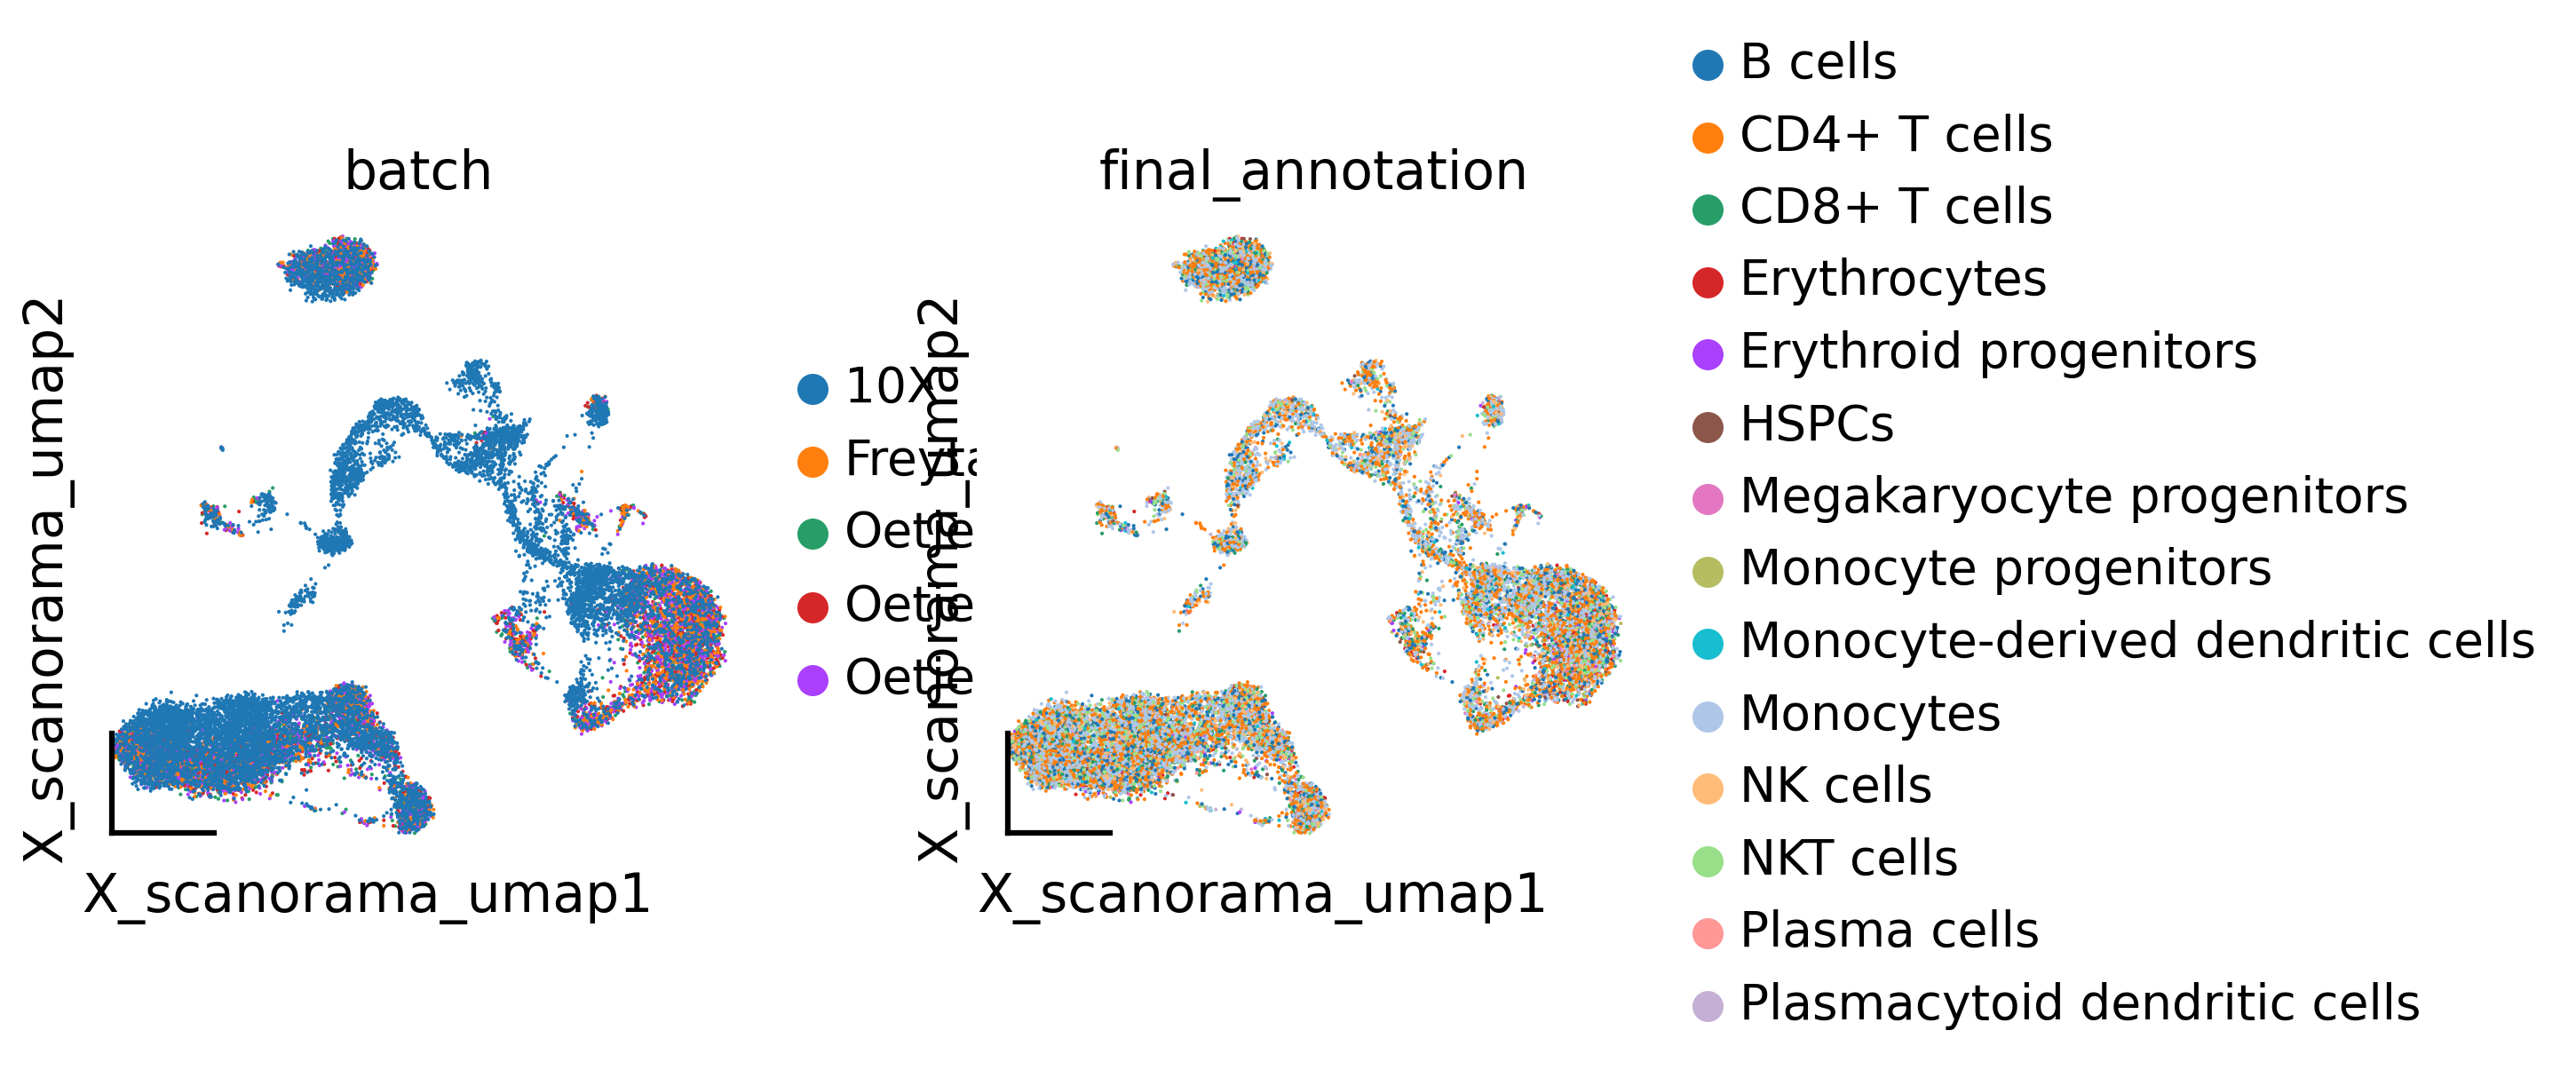

In [9]:
ov.utils.embedding(adata_scanorama,
                basis='X_scanorama_umap',frameon='small',
                color=['batch','final_annotation'],show=False)

In [10]:
adata_scanorama = adata_scanorama.raw.to_adata()
print(adata_scanorama.X.shape)

obs_df = adata_scanorama.obs.copy()
for col in obs_df.columns:
    if obs_df[col].dtype.name == "category":
        obs_df[col] = obs_df[col].astype("object")
adata_scanorama.obs = obs_df

adata_scanorama.write_h5ad('../Data/Immune_human_mouse/human_pbmc_bomarrow_sameplatform_scanorama.h5ad', 
                 convert_strings_to_categoricals = False)

(19168, 8128)


**`Visulize in R`**

In [1]:
# load function
source('./Seurat_Function.R')
# load package
options(stringsAsFactors = F)
for(i in pg){suppressMessages(library(i, character.only = T))}
# set memery and core number
options(future.globals.maxSize = 20 * 1024^3) 
plan(multicore, workers = 12)

**`Load h5ad Data and convert to seurat`**

In [3]:
getAnywhere(convert_h5ad_to_seuratv5)

A single object matching ‘convert_h5ad_to_seuratv5’ was found
It was found in the following places
  .GlobalEnv
with value

function (h5ad_path = "", output_dir = "", prefix_name = "", 
    include_all_assays = FALSE, save = TRUE, verbose = TRUE) 
{
    if (!file.exists(h5ad_path)) 
        stop("The specified .h5ad file does not exist.")
    if (!dir.exists(output_dir)) 
        stop("The specified output directory does not exist.")
    if (is.null(prefix_name) || prefix_name == "") 
        stop("The 'prefix_name' argument is missing or empty.")
    base_name <- tools::file_path_sans_ext(basename(h5ad_path))
    h5seurat_path <- sub("\\.h5ad$", ".h5seurat", h5ad_path)
    if (verbose) 
        cat("Converting .h5ad to .h5seurat...\n")
    Convert(h5ad_path, dest = "h5seurat", overwrite = TRUE, assay = "RNA", 
        filename = h5seurat_path)
    if (verbose) 
        cat("Detecting available assays...\n")
    get_available_assays <- function(h5seurat_path) {
        h5_structure <- 

In [2]:
h5ad_path = '../Data/Immune_human_mouse/human_pbmc_bomarrow_sameplatform_scanorama.h5ad'

obj <- convert_h5ad_to_seuratv5(h5ad_path = h5ad_path,
    output_dir = '../Data/raw_seurat/',
    prefix_name = 'human_pbmc_bomarrow_sameplatform_scanorama',
    include_all_assays = TRUE,
    save = TRUE,
    verbose = TRUE
)

Converting .h5ad to .h5seurat...


Warning message:
“Unknown file type: h5ad”
Creating h5Seurat file for version 3.1.5.9900

Adding X as data

Adding X as counts

Adding meta.features from var

Adding X_pca as cell embeddings for pca

Adding X_pca_umap as cell embeddings for pca_umap

Adding X_scanorama as cell embeddings for scanorama

Adding X_scanorama_umap as cell embeddings for scanorama_umap

Adding X_umap as cell embeddings for umap

Adding scaled|original|X_pca as cell embeddings for scaled|original|X_pca

Adding miscellaneous information for pca

Adding standard deviations for pca

Adding miscellaneous information for umap

Adding batch_colors to miscellaneous data

Adding final_annotation_colors to miscellaneous data

Adding hvg to miscellaneous data

Adding log1p to miscellaneous data

Adding pca_neighbours to miscellaneous data

Adding scaled|original|cum_sum_eigenvalues to miscellaneous data

Adding scaled|original|pca_var_ratios to miscellaneous data

Adding scanorama_neighbours to miscellaneous data

Addi

Detecting available assays...
Found assays: RNA 


Validating h5Seurat file

Initializing RNA with data

Adding counts for RNA

Adding feature-level metadata for RNA

Adding reduction pca

Adding cell embeddings for pca

Adding miscellaneous information for pca

Adding reduction pca_umap

Adding cell embeddings for pca_umap

Adding miscellaneous information for pca_umap

Warning message:
“Key ‘PC_’ taken, using ‘pcaumap_’ instead”
Adding reduction scaled|original|X_pca

Adding cell embeddings for scaled|original|X_pca

Adding miscellaneous information for scaled|original|X_pca

Warning message:
“Key ‘PC_’ taken, using ‘scaledoriginalxpca_’ instead”
Adding reduction scanorama

Adding cell embeddings for scanorama

Adding miscellaneous information for scanorama

Adding reduction scanorama_umap

Adding cell embeddings for scanorama_umap

Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from scanorama_umap_ to scanoramaumap_”
Adding miscellaneous information for scanorama_umap

Add

Converting assays to Seurat v5 Assay5 format...


Validating object structure

Updating object slots

Ensuring keys are in the proper structure

Updating matrix keys for DimReduc ‘pca’

Updating matrix keys for DimReduc ‘pca_umap’

Updating matrix keys for DimReduc ‘scaled.original.X_pca’

Updating matrix keys for DimReduc ‘scanorama’

Updating matrix keys for DimReduc ‘scanorama_umap’

Updating matrix keys for DimReduc ‘umap’

Ensuring keys are in the proper structure

Ensuring feature names don't have underscores or pipes

Updating slots in RNA

Updating slots in pca

Updating slots in pca_umap

Setting pca_umap DimReduc to global

Updating slots in scaled.original.X_pca

Updating slots in scanorama

Updating slots in scanorama_umap

Setting scanorama_umap DimReduc to global

Updating slots in umap

Setting umap DimReduc to global

Validating object structure for Assay ‘RNA’

Validating object structure for DimReduc ‘pca’

Validating object structure for DimReduc ‘pca_umap’

Validating object structure for DimReduc ‘scaled.original.

Saved Seurat v5 object to: ../Data/raw_seurat//human_pbmc_bomarrow_sameplatform_scanorama_v5.rds 
Conversion complete. Returning Seurat v5 object.
Removing temporary file: ../Data/Immune_human_mouse/human_pbmc_bomarrow_sameplatform_scanorama.h5seurat 


In [5]:
obj <- readRDS("../Data/raw_seurat/human_pbmc_bomarrow_sameplatform_scanorama_v5.rds")
obj

An object of class Seurat 
8128 features across 19168 samples within 1 assay 
Active assay: RNA (8128 features, 0 variable features)
 2 layers present: counts, data
 6 dimensional reductions calculated: pca, pca_umap, scaled.original.X_pca, scanorama, scanorama_umap, umap

In [6]:
unique(obj@meta.data$final_annotation)
length(unique(obj@meta.data$final_annotation))

[1] "Monocytes"                        "CD4+ T cells"                    
 [3] "NKT cells"                        "HSPCs"                           
 [5] "Erythrocytes"                     "B cells"                         
 [7] "Plasmacytoid dendritic cells"     "Monocyte progenitors"            
 [9] "CD8+ T cells"                     "Monocyte-derived dendritic cells"
[11] "Plasma cells"                     "Erythroid progenitors"           
[13] "Megakaryocyte progenitors"        "NK cells"

[1] 14

In [7]:
obj@meta.data$celltype <- factor(
  obj@meta.data$final_annotation,
  levels = c("HSPCs","Monocyte progenitors","Monocytes",
  "Monocyte-derived dendritic cells","Plasmacytoid dendritic cells", 
  "Erythroid progenitors", "Megakaryocyte progenitors", "Erythrocytes",
  "CD4+ T cells", "CD8+ T cells","NKT cells",  "NK cells",
  "B cells", "Plasma cells")
)
palette_clusters <- c(
  "#20b2aa","#e88ebf","#e01276", 
  "#f6f7a1", "#dbc902", 
  "#5a95d1", "#ff7f00","#e01212", 
  "#1cad15", "#b2df8a","#87a86a", "#e6b000", 
  "#a37d00", "#995202"
)

In [8]:
unique(obj@meta.data$batch)
length(unique(obj@meta.data$batch))

[1] "Oetjen_A" "Oetjen_P" "Oetjen_U" "Freytag"  "10X"

[1] 5

In [9]:
obj@meta.data$batch <- factor(
  obj@meta.data$batch,
  levels = c('Oetjen_A','Oetjen_P','Oetjen_U',
             #'Sun_sample1_CS','Sun_sample2_KC','Sun_sample3_TB','Sun_sample4_TC',
             'Freytag','10X') # ,'Villani'
)
palette_batch <- c('#F7F398','#F1BB72', '#ff7f00',
  #'#CCE0F5','#C1E6F3','#57C3F3','#5a95d1',
  '#E59CC4', '#AB3282'#,'#1cad15'
)

In [10]:
obj@meta.data$chemistry <- factor(
  obj@meta.data$chemistry,
  levels = c('v2_10X','v3_10X') # ,'10X','smart-seq2'
)
palette_tech <- c("#5a95d1","#20b2aa") # ,"#e01276","#ff7f00"

In [11]:
pca_umap <- DimPlot(obj,cols = palette_clusters, group.by = "celltype", reduction = "pca_umap") + ggtitle("Unintegrated")

scanorama_umap <- DimPlot(obj,cols = palette_clusters, group.by = "celltype", reduction = "scanorama_umap") + ggtitle("Scanorama (Latent space)")


In [12]:
batch_pca_umap <- DimPlot(obj,cols = palette_batch, group.by = "batch", reduction = "pca_umap",pt.size = 0.1, alpha = c(0.6)) + ggtitle("Unintegrated")

batch_scanorama_umap <- DimPlot(obj, cols = palette_batch, group.by = "batch", reduction = "scanorama_umap",pt.size = 0.1, alpha = c(0.6)) + 
  ggtitle("Scanorama (Latent space)")


In [13]:
tech_pca_umap <- DimPlot(obj, cols = palette_tech, group.by = "chemistry", reduction = "pca_umap", pt.size = 0.1, alpha = c(0.6)) + 
  ggtitle("Unintegrated")

tech_scanorama_umap <- DimPlot(obj, cols = palette_tech, group.by = "chemistry", reduction = "scanorama_umap", pt.size = 0.1, alpha = c(0.6)) + 
  ggtitle("Scanorama (Latent space)")


In [14]:
library(cowplot)
library(ggplot2)
library(gridExtra)
plots_no_legend <- list(
  pca_umap+ theme(legend.position = "none",
                   axis.title = element_blank(),
                   axis.text = element_blank(),
                   axis.ticks = element_blank(),
                   axis.line = element_blank()),
  batch_pca_umap+ theme(legend.position = "none",
                   axis.title = element_blank(),
                   axis.text = element_blank(),
                   axis.ticks = element_blank(),
                   axis.line = element_blank()),
  tech_pca_umap+ theme(legend.position = "none",
                   axis.title = element_blank(),
                   axis.text = element_blank(),
                   axis.ticks = element_blank(),
                   axis.line = element_blank())
  )
final_plot <- plot_grid(plotlist = plots_no_legend, nrow = 1, align = "h")
ggsave("../Analysis/human_pbmc_bomarrow_sameplatform_umap_unintegrated_no_axis.pdf", 
       plot = final_plot, width = 12, height = 4)


Attaching package: ‘cowplot’


The following object is masked from ‘package:patchwork’:

    align_plots



Attaching package: ‘gridExtra’


The following object is masked from ‘package:Biobase’:

    combine


The following object is masked from ‘package:BiocGenerics’:

    combine


The following object is masked from ‘package:dplyr’:

    combine




In [15]:
library(cowplot)
library(ggplot2)
library(gridExtra)
plots_no_legend <- list(
  scanorama_umap+ theme(legend.position = "none",
                   axis.title = element_blank(),
                   axis.text = element_blank(),
                   axis.ticks = element_blank(),
                   axis.line = element_blank()),
  batch_scanorama_umap+ theme(legend.position = "none",
                   axis.title = element_blank(),
                   axis.text = element_blank(),
                   axis.ticks = element_blank(),
                   axis.line = element_blank()),
  tech_scanorama_umap+ theme(legend.position = "none",
                   axis.title = element_blank(),
                   axis.text = element_blank(),
                   axis.ticks = element_blank(),
                   axis.line = element_blank())
  )
final_plot <- plot_grid(plotlist = plots_no_legend, nrow = 1, align = "h")
ggsave("../Analysis/human_pbmc_bomarrow_sameplatform_umap_scanorama_no_axis.pdf", 
       plot = final_plot, width = 12, height = 4)